In [ ]:
#Parte I: limpieza de la base de datos y la maldición de la multidimensionalidad

In [13]:
import pandas as pd
import os


# Cargar la tabla acortada directamente
df = pd.read_excel("/Users/bautistagoulu/Desktop/Big Data/df_dummies_final.xlsx")

# Ver las primeras filas
df.head()
#Esta base incluye todas las variables en ambos trimestres expresadas de manera homogénea.

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,dummy_primero,dummy_segundo,dummy_tercero,dummy_cuarto,dummy_quinto,dummy_sexto,dummy_septimo,dummy_octavo,dummy_noveno,dummy_educacion_especial
0,TQRMNOSYUHKNKMCDEIGED00856897,2024,1,1,1,1,43,N,30,159,...,0,1,0,0,0,0,0,0,0,0
1,TQRMNOSYUHKNKMCDEIGED00856897,2024,1,1,2,1,43,N,30,159,...,0,0,0,0,0,0,0,0,0,0
2,TQRMNORTVHLOKQCDEIMBF00855868,2024,1,1,1,1,43,N,36,138,...,0,0,0,0,0,0,0,0,0,0
3,TQRMNORTVHLOKQCDEIMBF00855868,2024,1,1,2,1,43,N,36,138,...,0,0,1,0,0,0,0,0,0,0
4,TQRMNORSXHMLLOCDEIMBF00802814,2024,1,1,1,1,43,N,36,149,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Asegurarse de que las columnas son string
cat_vars = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'CAT_OCUP', 'PP02C1','REGION']
for col in cat_vars:
    df[col] = df[col].astype(str).str.strip()

# CH04 – Sexo: texto a código
df['CH04'] = df['CH04'].replace({
    'Hombre': 1,
    'Mujer': 2
})

# CH07 – Estado civil
df['CH07'] = df['CH07'].replace({
    'unido?': 1,
    'casado?': 2,
    'separado/a o divorciado/a?': 3,
    'viudo/a?': 4,
    'soltero/a?': 5
})

# CH08 – Cobertura médica
df['CH08'] = df['CH08'].replace({
    'Obra social': 1,
    'Mutual / prepaga / servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Obra social y mutual / prepaga / servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual / prepaga / servicio de emergencia / Planes y seguros públicos': 23,
    'Obra social, mutual / prepaga / servicio de emergencia y planes y seguros públicos': 123
})

# NIVEL_ED – Nivel educativo
df['NIVEL_ED'] = df['NIVEL_ED'].replace({
    'Prim. incompleta': 1,
    'Prim. completa': 2,
    'Sec. incompleta': 3,
    'Sec. completa': 4,
    'Univ. incompleta': 5,
    'Univ. completa': 6,
    'Sin instrucción': 7,
    'Ns/Nr': 9
})

# ESTADO – Condición de actividad
df['ESTADO'] = df['ESTADO'].replace({
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3
})

# CAT_INAC – Inactividad
df['CAT_INAC'] = df['CAT_INAC'].replace({
    'Jubilado/Pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6': 5,
    'Discapacitado': 6,
    'Otros': 7
})

# CAT_OCUP – Categoría ocupacional
df['CAT_OCUP'] = df['CAT_OCUP'].replace({
    'Patrón': 1,
    'Cuenta propia': 2,
    'Empleado': 3,
    'Familiar no remunerado': 4,
    'Ns/Nr': 9
})

# PP02C1 – Búsqueda activa
df['PP02C1'] = df['PP02C1'].replace({
    'Sí': 1,
    'No': 0
})

df['REGION'] = df['REGION'].astype(str).str.strip()
df['REGION'] = df['REGION'].replace({'': '43', 'Pampeana': '43'})
df['REGION'] = pd.to_numeric(df['REGION'], errors='coerce').fillna(43).astype('Int64')


# Convertir a tipo numérico por si quedan strings numéricos
for col in cat_vars:
    df[col] = pd.to_numeric(df[col], errors='coerce').round(0).astype('Int64')  # Int64 admite NaNs

# Verificamos
print(df[cat_vars].head())
df.to_excel("/Users/bautistagoulu/Desktop/Big Data/df_dummies_final_limpio.xlsx", index=False)


   CH04  CH07  CH08  NIVEL_ED  ESTADO  CAT_INAC  CAT_OCUP  PP02C1  REGION
0     1     5     4         3       1         0         2       2      43
1     2     5     1         6       1         0         3       2      43
2     2     2     1         2       3         4         9       2      43
3     1     2     1         3       1         0         3       2      43
4     2     2     1         4       3         4         9       2      43


In [16]:
# Ejercicio 1
print("Cantidad de observaciones:", df.shape[0])
print("Cantidad de variables:", df.shape[1])
print(df['REGION'].value_counts(dropna=False))


Cantidad de observaciones: 4883
Cantidad de variables: 226
REGION
43    4883
Name: count, dtype: Int64


In [17]:
# Ejercicio 2

# Ya habiamos creado las columnas para las variables categoricas en en el TP1

# Identificar columnas dummies
dummy_cols = [col for col in df.columns if col.startswith("dummy_")]

# Dimensión sin las dummies
print("Sin dummies:", df.drop(columns=dummy_cols).shape)

# Dimensión con las dummies
print("Con dummies:", df.shape)

Sin dummies: (4883, 181)
Con dummies: (4883, 226)


In [18]:
# Ejercicio 3

# Seleccionar las 10 variables
variables_elegidas = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 
                      'ESTADO', 'CAT_INAC', 'IPCF', 'PP02C1', 'CAT_OCUP']

for col in df.columns:
    df[col] = df[col].astype(str).str.strip()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').round(0).astype('Int64')


# Estamos en condiciones de crear las dummies:

#Para CH04 (sexo) nos quedan dos nuevas columnas tal que:
df['dummy_varon'] = df['CH04'].apply(lambda x: 1 if x == 1 else 0)
df['dummy_mujer'] = df['CH04'].apply(lambda x: 1 if x == 2 else 0)

# Para CH07 (Estado Civil) nos quedaran 5 nuevas columnas tal que:
df['dummy_unido'] = df['CH07'].apply(lambda x: 1 if x == 1 else 0)
df['dummy_casado'] = df['CH07'].apply(lambda x: 1 if x == 2 else 0)
df['dummy_separado'] = df['CH07'].apply(lambda x: 1 if x == 3 else 0)
df['dummy_viudo'] = df['CH07'].apply(lambda x: 1 if x == 4 else 0)
df['dummy_soltero'] = df['CH07'].apply(lambda x: 1 if x == 5 else 0)

# Para CH08 (Cobertura Medica) nos quedaran 9 nuevas columnas tal que:
df['dummy_obra_social'] = df['CH08'].apply(lambda x: 1 if x == 1 else 0)
df['dummy_mutual'] = df['CH08'].apply(lambda x: 1 if x == 2 else 0)
df['dummy_planes_publicos'] = df['CH08'].apply(lambda x: 1 if x == 3 else 0)
df['dummy_no_paga'] = df['CH08'].apply(lambda x: 1 if x == 4 else 0)
df['dummy_ns_nr'] = df['CH08'].apply(lambda x: 1 if x == 9 else 0)
df['dummy_obra_mutual'] = df['CH08'].apply(lambda x: 1 if x == 12 else 0)
df['dummy_obra_planes'] = df['CH08'].apply(lambda x: 1 if x == 13 else 0)
df['dummy_mutual_planes'] = df['CH08'].apply(lambda x: 1 if x == 23 else 0)
df['dummy_obra_mutual_planes'] = df['CH08'].apply(lambda x: 1 if x == 123 else 0)

# NIVEL_ED – Nivel educativo
df['dummy_primario_incompleto'] = df['NIVEL_ED'].apply(lambda x: 1 if x == 1 else 0)
df['dummy_primario_completo'] = df['NIVEL_ED'].apply(lambda x: 1 if x == 2 else 0)
df['dummy_secundario_incompleto'] = df['NIVEL_ED'].apply(lambda x: 1 if x == 3 else 0)
df['dummy_secundario_completo'] = df['NIVEL_ED'].apply(lambda x: 1 if x == 4 else 0)
df['dummy_superior_incompleto'] = df['NIVEL_ED'].apply(lambda x: 1 if x == 5 else 0)
df['dummy_superior_completo'] = df['NIVEL_ED'].apply(lambda x: 1 if x == 6 else 0)
df['dummy_sin_instruccion'] = df['NIVEL_ED'].apply(lambda x: 1 if x == 7 else 0)
df['dummy_ns_nr'] = df['NIVEL_ED'].apply(lambda x: 1 if x == 9 else 0)

# ESTADO – Condición de actividad
df['dummy_ocupado'] = df['ESTADO'].apply(lambda x: 1 if x == 1 else 0)
df['dummy_desocupado'] = df['ESTADO'].apply(lambda x: 1 if x == 2 else 0)
df['dummy_inactivo'] = df['ESTADO'].apply(lambda x: 1 if x == 3 else 0)
df['dummy_menor_10'] = df['ESTADO'].apply(lambda x: 1 if x == 4 else 0)

# CAT_INAC – Inactividad
df['dummy_jubilado'] = df['CAT_INAC'].apply(lambda x: 1 if x == 1 else 0)
df['dummy_rentista'] = df['CAT_INAC'].apply(lambda x: 1 if x == 2 else 0)
df['dummy_estudiante'] = df['CAT_INAC'].apply(lambda x: 1 if x == 3 else 0)
df['dummy_ama_casa'] = df['CAT_INAC'].apply(lambda x: 1 if x == 4 else 0)
df['dummy_menor_6'] = df['CAT_INAC'].apply(lambda x: 1 if x == 5 else 0)
df['dummy_discapacitado'] = df['CAT_INAC'].apply(lambda x: 1 if x == 6 else 0)
df['dummy_otros_inac'] = df['CAT_INAC'].apply(lambda x: 1 if x == 7 else 0)

# CAT_OCUP – Categoría ocupacional
df['dummy_patron'] = df['CAT_OCUP'].apply(lambda x: 1 if x == 1 else 0)
df['dummy_cuenta_propia'] = df['CAT_OCUP'].apply(lambda x: 1 if x == 2 else 0)
df['dummy_obrero'] = df['CAT_OCUP'].apply(lambda x: 1 if x == 3 else 0)
df['dummy_trabajador_familiar'] = df['CAT_OCUP'].apply(lambda x: 1 if x == 4 else 0)
df['dummy_ns_nr_ocup'] = df['CAT_OCUP'].apply(lambda x: 1 if x == 9 else 0)


In [19]:
#Parte II: Clustering

In [20]:
# Ejercicio 1

#Filtrar variables que no respondieron en la columna ESTADO, osea, aquellas cuy o valor sea 0:

df = df[df['ESTADO'] != 0].copy()
print("Cantidad de observaciones:", df.shape[0])

Cantidad de observaciones: 4881


In [31]:
# Ejercicio 2

#ITEM (a)

#Utilizaremos las variable Ingreso per Capita (IPCF) y la variable de años de educacion (la tenemos que crear)

def calcular_anios_educ(row):
    nivel = row['NIVEL_ED']
    ultimo_anio = row['CH14']
    
    # Si falta alguno o el año es 99 (No sabe/No responde), devolvemos None
    if pd.isna(nivel) or pd.isna(ultimo_anio):
        return None

    try:
        ultimo_anio = int(ultimo_anio)
    except:
        return None

    if ultimo_anio == 99 or ultimo_anio == 0:
        return None

    # Casos según nivel educativo
    if nivel == 1:  # Primaria incompleta
        return min(ultimo_anio, 6)
    elif nivel == 2:  # Primaria completa
        return 7
    elif nivel == 3:  # Secundaria incompleta
        return 7 + min(ultimo_anio, 5)
    elif nivel == 4:  # Secundaria completa
        return 12
    elif nivel == 5:  # Superior universit. incompleto
        return 13 + min(ultimo_anio, 3)
    elif nivel == 6:  # Superior universit. completo
        return 17
    elif nivel == 7:  # Sin instrucción
        return 0
    else:
        return None

# Crear la columna AÑOS_EDUC
df['AÑOS_EDUC'] = df.apply(calcular_anios_educ, axis=1)



In [33]:
df['AÑOS_EDUC'] = df['AÑOS_EDUC'].dropna().astype(int)
df['AÑOS_EDUC'] = pd.to_numeric(df['AÑOS_EDUC'], errors='coerce').astype('Int64')
df[['NIVEL_ED', 'CH14', 'AÑOS_EDUC']].dropna().head(10)

#A partir de NIVEL_ED (nivel educativo alcanzado) y CH14 (último año aprobado), 
#construimos una variable que estima los años totales de educación formal. 
#Si la persona no terminó un nivel, usamos CH14 para contar cuántos años cursó dentro de ese tramo. 
#Si completó el nivel, asignamos un valor fijo según la duración típica del sistema educativo. 
#Además, excluimos casos con respuestas inválidas como 99.

,NIVEL_ED,CH14,AÑOS_EDUC
0,3,2,9
3,3,3,10
8,3,8,12
9,1,4,4
12,5,2,15
15,2,7,7
16,3,2,9
19,3,3,10
21,1,3,3
22,1,3,3


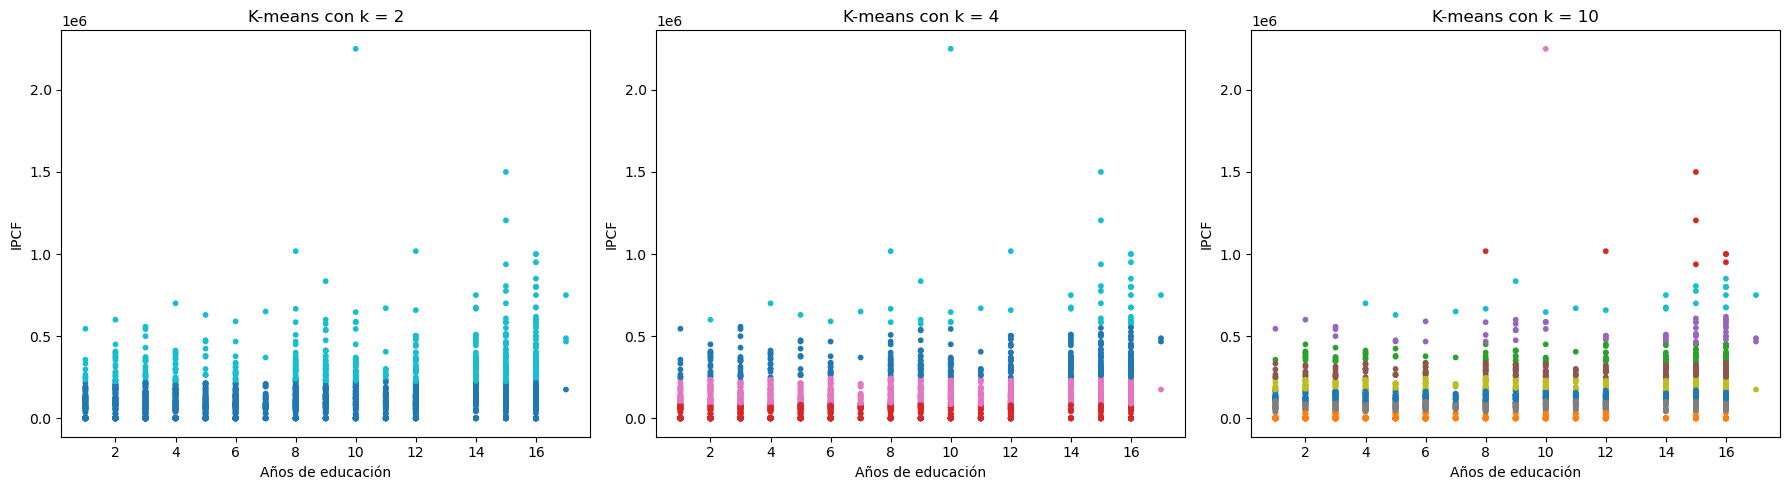

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Eliminar filas con datos faltantes
X = df[['IPCF', 'AÑOS_EDUC']].dropna()

# Definir valores de k
ks = [2, 4, 10]
modelos = {}
etiquetas = {}

# Aplicar K-means
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X)
    modelos[k] = kmeans
    etiquetas[k] = kmeans.labels_

# Graficar resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(ks):
    axes[i].scatter(X['AÑOS_EDUC'], X['IPCF'], c=etiquetas[k], cmap='tab10', s=10)
    axes[i].set_title(f'K-means con k = {k}')
    axes[i].set_xlabel('Años de educación')
    axes[i].set_ylabel('IPCF')

plt.tight_layout()
plt.show()

# Al aplicar K-means con k = 2, los datos se agrupan en dos grandes perfiles:
# uno con bajo ingreso y baja educación, y otro con mayores niveles en ambas dimensiones.
# Con k = 4, emergen grupos más específicos que reflejan trayectorias mixtas de ingreso y educación.
# Finalmente, con k = 10 se identifican perfiles más detallados, aunque algunos se solapan,
# captando mejor la heterogeneidad de la población pero perdiendo algo de claridad interpretativa.



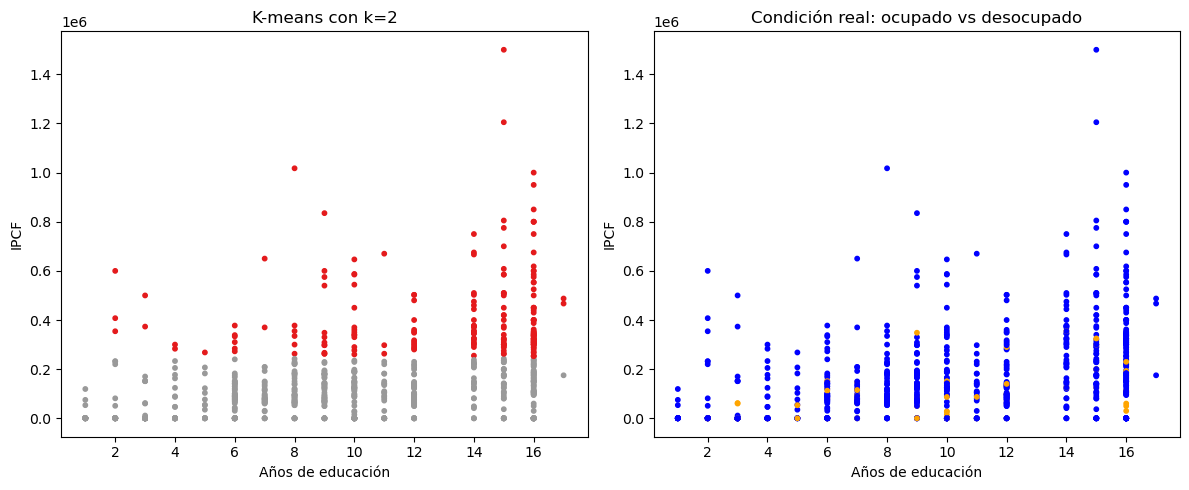

In [37]:
#ITEM (b)
# Filtrar datos con ingresos, años de educación y estado válidos
df_cluster = df[['IPCF', 'AÑOS_EDUC', 'ESTADO']].dropna()
df_cluster = df_cluster[df_cluster['ESTADO'].isin([1, 2])]

# Aplicar K-means con k = 2
X_cluster = df_cluster[['IPCF', 'AÑOS_EDUC']]
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_cluster)

# Crear variable binaria para condición real
df_cluster['ocup_desocup'] = df_cluster['ESTADO'].apply(lambda x: 'Ocupado' if x == 1 else 'Desocupado')

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico por grupos del algoritmo
axes[0].scatter(df_cluster['AÑOS_EDUC'], df_cluster['IPCF'], c=df_cluster['cluster'], cmap='Set1', s=10)
axes[0].set_title("K-means con k=2")
axes[0].set_xlabel("Años de educación")
axes[0].set_ylabel("IPCF")

# Gráfico por condición real
colors = df_cluster['ocup_desocup'].map({'Ocupado': 'blue', 'Desocupado': 'orange'})
axes[1].scatter(df_cluster['AÑOS_EDUC'], df_cluster['IPCF'], c=colors, s=10)
axes[1].set_title("Condición real: ocupado vs desocupado")
axes[1].set_xlabel("Años de educación")
axes[1].set_ylabel("IPCF")

plt.tight_layout()
plt.show()

# Gráfico 1: resultado de K-means
# Gráfico 2: condición real (ocupado vs desocupado)

# El objetivo era evaluar si el algoritmo K-means, utilizando solo ingreso per cápita (IPCF) 
# y años de educación (AÑOS_EDUC), podía separar correctamente a las personas ocupadas 
# de las desocupadas. Esto parte de la idea de que, en promedio, mayor educación e ingreso 
# están asociados a una mayor probabilidad de estar ocupado. Sin embargo, al comparar 
# los grupos creados por el algoritmo con la condición laboral real (variable ESTADO), 
# se observa una fuerte superposición. Esto indica que, aunque estas variables económicas 
# influyen, no son suficientes por sí solas para distinguir correctamente la situación laboral, 
# reflejando la complejidad del mercado de trabajo.


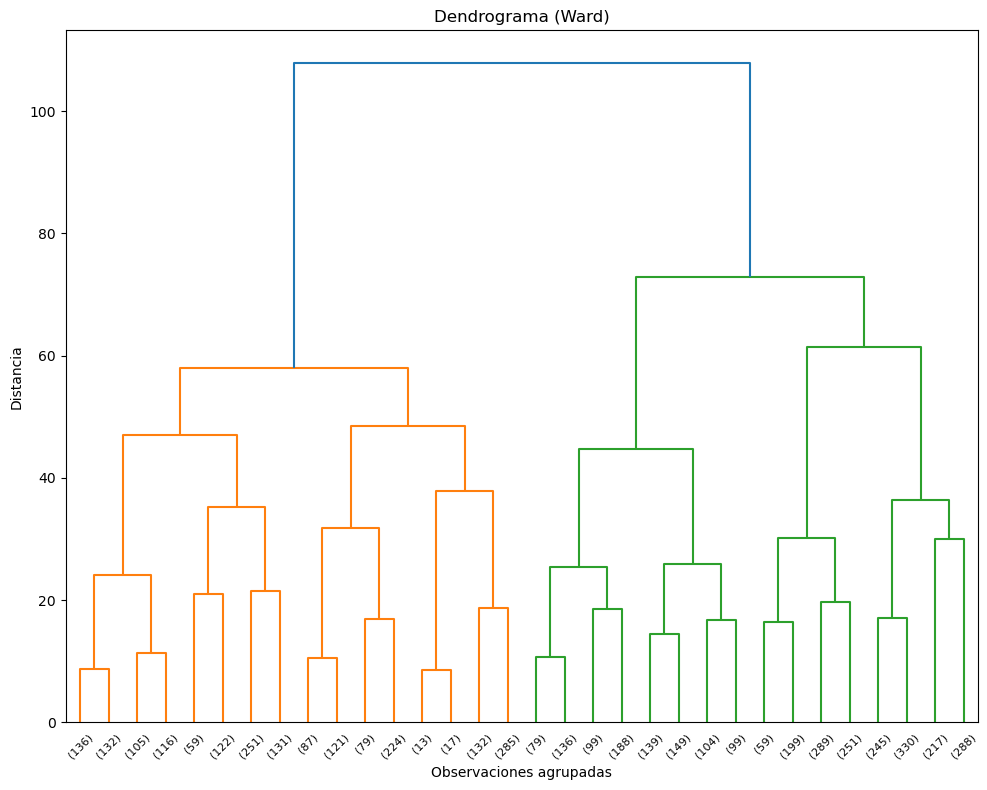

In [43]:
#Ejercicio 3
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Filtramos solo las variables relevantes y eliminamos filas con valores faltantes
variables = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED']
df_jerarquico = df[variables].dropna()

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_jerarquico)

# Clustering jerárquico con método Ward
Z = linkage(X_scaled, method='ward')

# Graficar dendrograma truncado
plt.figure(figsize=(10, 8))
dendrogram(Z, truncate_mode='level', p=4)
plt.axhline(y=150, c='red', linewidth=2)
plt.title("Dendrograma (Ward)")
plt.xlabel("Observaciones agrupadas")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()
